In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
pred_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pred_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_feature = train_data[['Sex','Age']]
train_value = train_data["Survived"]

pred_feature = pred_data[['Sex','Age']]

# One hot encoding Sex
train_feature['Sex'] = train_feature['Sex'].replace(['male','female'],[0,1])
pred_feature['Sex'] = pred_feature['Sex'].replace(['male','female'],[0,1])

# handle missing values
train_feature['Age'].fillna(value=train_feature['Age'].mean(),inplace=True)
pred_feature['Age'].fillna(value=train_feature['Age'].mean(),inplace=True)

/tmp/ipykernel_23/3116066650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature['Sex'] = train_feature['Sex'].replace(['male','female'],[0,1])
/tmp/ipykernel_23/3116066650.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_feature['Sex'] = pred_feature['Sex'].replace(['male','female'],[0,1])
/tmp/ipykernel_23/3116066650.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [6]:
pred_feature.head()

,Sex,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lrModel=LogisticRegression()
lrModel.fit(train_feature,train_value)

LogisticRegression()

In [8]:
pred_value = lrModel.predict(pred_feature)

In [9]:
output = pd.DataFrame({'PassengerId': pred_data['PassengerId'], 'Survived': pred_value})
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
output.to_csv('submission.csv', index=False)

Saving the model

In [11]:
import joblib

# Save the model using joblib
filename = 'finalized_model.sav'
joblib.dump(lrModel, filename)

# Load the model
loaded_model = joblib.load(filename)
result = loaded_model.predict(pred_feature)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [12]:
import pickle

# Save the model using pickle
filename = 'finalized_model.sav'
pickle.dump(lrModel, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(pred_feature)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


pickle have maintainence and security issue(don't load pickle from untrusted source).  ...

# Different models

In [13]:
from sklearn.model_selection import train_test_split

X = train_feature
y = train_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lrModel=LogisticRegression()
lrModel.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred = lrModel.predict(X_test)

In [16]:
coefficients = lrModel.coef_
intercept = lrModel.intercept_

print("cofficients :",coefficients)
print("intercept :",intercept)

cofficients : [[ 2.45625856 -0.00940567]]
intercept : [-1.25197023]


## Performance metric

#### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

First row: Non-clicked Ads, the negative class:
* 143 were correctly classified as Non-clicked Ads. **True negatives**. 
* Remaining 6 were wrongly classified as clicked Ads. **False positive**


Second row: The clicked Ads, the positive class:
* 3 were incorrectly classified as Non-clicked Ads. **False negatives**
* 146 were correctly classified clicked Ads. **True positives**

#### 2. Precision

**Precision** measures the accuracy of positive predictions. 

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

#### 4. F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ 

The $F_1$ score favours classifiers that have similar precision and recall.

#### 5. Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

Confusion Matrix 
 [[88 12]
 [30 49]]


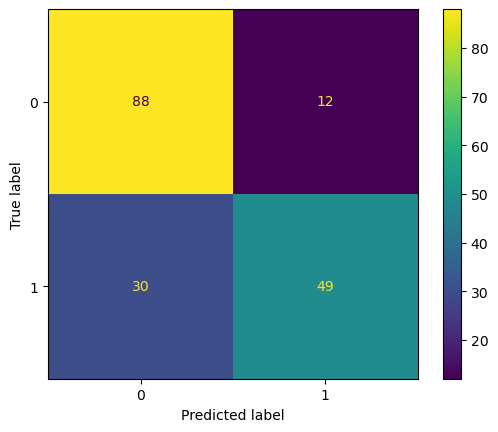

In [17]:
# Confusion matrix display

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("precision is %2.3f" % precision_score(y_test, y_pred))
print("recall is %2.3f" % recall_score(y_test, y_pred))
print("f1_score is %2.3f" % f1_score(y_test, y_pred))
print("roc_auc_score is %2.3f" % roc_auc_score(y_test, y_pred))

accuracy is 0.765
precision is 0.803
recall is 0.620
f1_score is 0.700
roc_auc_score is 0.750


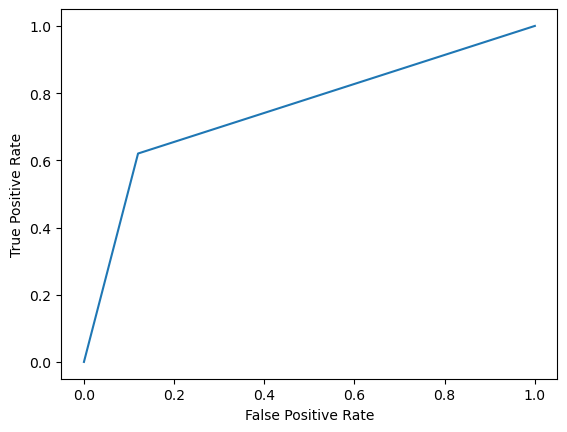

In [19]:
# roc_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

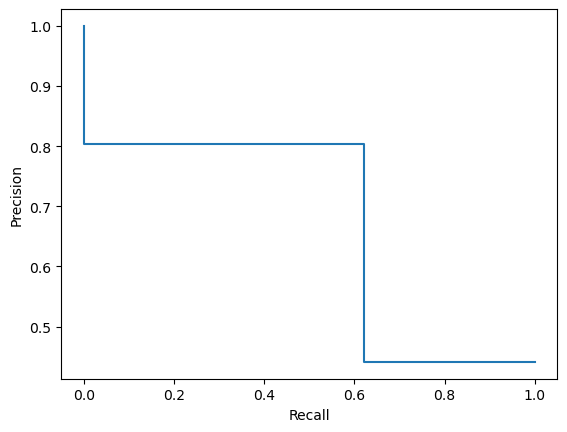

In [20]:
# precision_recall_curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

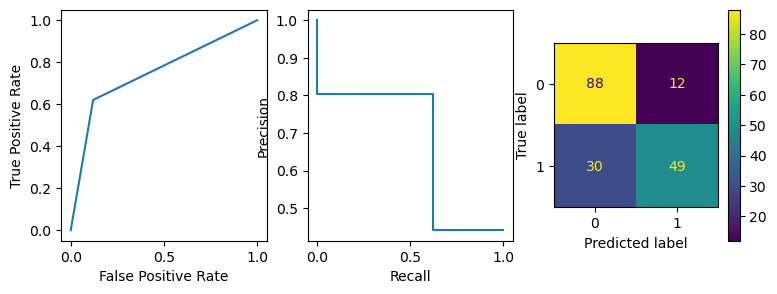

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
disp.plot(ax=ax3)
plt.show()

Support Vector Machines   
KNeighborsClassifier   
Gaussian Naive Bayes   
Perceptron  
Linear SVC   
Stochastic Gradient Descent   
Decision Tree   
Random Forest   
AdaBoostClassifier   
LinearDiscriminantAnalysis  
QuadraticDiscriminantAnalysis  

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions?kernelSessionId=10431564

https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier?kernelSessionId=560373